###Terminology

**Enviornemt** This is what our *agent* will explore.

**Agent** an agent is an entity that is exploring the enviornment.

**State** The state simply tells us about the status of the agent.

**Action** any interaction between the agent and enviornment would be considered an action.

**Reward** every action that our agent takes will result in a reward of some magnitude (positive or negative).
###Q-Learning
Q-learning is a model-free reinforcement learning algorithm used to find the optimal action-selection policy for a given finite Markov decision process. It works by learning the value of state-action pairs (Q-values) and updating them iteratively using the Bellman equation based on the reward received and the maximum expected future rewards. The goal is to maximize the total cumulative reward over time. It makes/Table for each state and different action.
Open AI GYM
https://www.gymlibrary.dev/index.html


In [12]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v1')
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions
env.reset()
action = env.action_space.sample()
new_state, reward, done, info = env.step(action)
env.render()

16
4


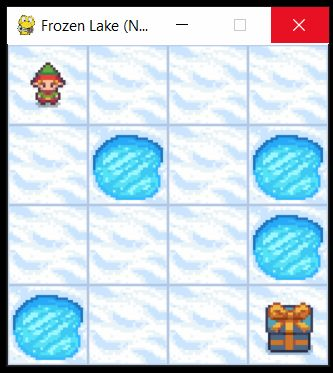

In [13]:
STATES = env.observation_space.n
ACTIONS = env.action_space.n
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 30

LEARNING_RATE = 0.7
GAMMA = 0.96

RENDER = False

epsilon = 0.9
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")


[[3.11820515e-01 3.38668839e-02 3.69338785e-02 4.08178562e-02]
 [7.81938437e-03 3.72516921e-03 2.95556906e-03 2.28243944e-01]
 [7.98767002e-02 1.27374132e-02 1.65952638e-02 1.65253355e-02]
 [7.57954524e-03 6.07114928e-03 1.01887593e-02 1.59742725e-02]
 [3.59420092e-01 1.28257386e-02 2.21496096e-02 1.21623967e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.29913379e-04 1.98845162e-04 1.93291229e-02 9.30368906e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.32914226e-02 2.99228494e-02 2.02547243e-02 3.71544203e-01]
 [1.22655942e-02 4.19739239e-01 1.74090962e-02 4.31251837e-03]
 [3.60272418e-01 1.52331280e-03 2.25324881e-03 3.42818163e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.12652471e-01 3.85193301e-02 5.21141735e-01 1.11462507e-01]
 [2.58202265e-01 6.00383647e-01 2.30584168e-01 2.87724556e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

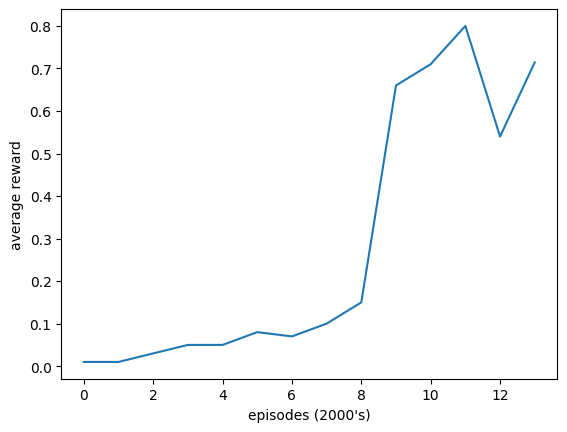

In [17]:
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (2000\'s)')
plt.show()